Loading all necessary libraries and setting up the GPU config

In [10]:
import os
os.environ["CUDA_VISIBLE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [11]:
gpu_options = tf.GPUOptions(allow_growth = True)
config=tf.ConfigProto(gpu_options=gpu_options)
config.gpu_options.per_process_gpu_memory_fraction = 0.34

Loading the MNIST data set below.

In [12]:
#Question 1

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Setting some of the parameters that would be used for building and training the model.

In [13]:
#Set parameters for the model

#Number of features in each image
n_features = 784

#Total number of classes in output
n_classes = 10
batch_size = 100
#Learning rate
lr = 0.0001
epochs = 30

#To store error of each epoch
error = np.zeros(epochs)

Initializing placeholders for input and output

In [14]:
#Setting placeholders for inputs and outputs

q1_x = tf.placeholder(tf.float32, [None, n_features])
q1_y = tf.placeholder(tf.float32)

Below is the feedforward structure of the network. We are using 5 layers with 1024 units in each and Xavier initialization for the weights

In [15]:
#Setting up the structure of the network

q1_l1 = tf.layers.dense(q1_x, 1024, activation = tf.nn.relu, kernel_initializer = tf.contrib.layers.xavier_initializer(), name = 'q1_l1')

q1_l2 = tf.layers.dense(q1_l1, 1024, activation = tf.nn.relu, kernel_initializer = tf.contrib.layers.xavier_initializer(), name = 'q1_l2')

q1_l3 = tf.layers.dense(q1_l2, 1024, activation = tf.nn.relu, kernel_initializer = tf.contrib.layers.xavier_initializer(), name = 'q1_l3')

q1_l4 = tf.layers.dense(q1_l3, 1024, activation = tf.nn.relu, kernel_initializer = tf.contrib.layers.xavier_initializer(), name = 'q1_l4')

q1_l5 = tf.layers.dense(q1_l4, 1024, activation = tf.nn.relu, kernel_initializer = tf.contrib.layers.xavier_initializer(), name = 'q1_l5')

q1_output = tf.layers.dense(q1_l5, n_classes, kernel_initializer= tf.contrib.layers.xavier_initializer(), name = 'q1_output')

prediction = tf.nn.softmax(logits = q1_output)

Defining the cost and optimizer parameters

In [16]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = q1_output, labels = q1_y))
optimizer = tf.train.AdamOptimizer(learning_rate = lr).minimize(cost)

Creating the session below and initializing all global variables defined up to now.

In [17]:
sess = tf.Session(config = config)

saver = tf.train.Saver()

sess.run(tf.global_variables_initializer())

Training the model for 30 epochs. Displaying cross entropy loss for only the last epoch.

In [18]:
#Training the model
    
for epoch in range(epochs):
    for _ in range(int(mnist.train.num_examples/batch_size)):
        epoch_x, epoch_y = mnist.train.next_batch(batch_size)
        l, _ = sess.run([cost, optimizer], feed_dict = {q1_x: epoch_x, q1_y: epoch_y})
        error[epoch] += l

print('Epoch', epochs, 'completed out of ', epochs,'; loss: ', error[epochs-1])

Epoch 30 completed out of  30 ; loss:  3.371414766178532


Doing a feed forward for the test set on the trained network to see the accuracy.

In [19]:
#Getting Test Accuracy

correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(q1_y, 1))

accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
print('Accuracy:',accuracy.eval({q1_x:mnist.test.images, q1_y:mnist.test.labels}, session = sess))

Accuracy: 0.9822


Saving the trained model

In [20]:
saver.save(sess, 'q1model/q1')

'q1model/q1'

In [21]:
sess.close()

### Part 5

Starting a new session and restoring the saved model

In [22]:
saver = tf.train.Saver()

sess = tf.Session(config = config)

saver.restore(sess, 'q1model/q1')

INFO:tensorflow:Restoring parameters from q1model/q1


Obtaining the weights and biases of each of the layers from the trained network

In [23]:
#Getting weights of each of the dense layers

w_l1 = tf.get_default_graph().get_tensor_by_name(os.path.split(q1_l1.name)[0] + '/kernel:0')
b_l1 = tf.get_default_graph().get_tensor_by_name(os.path.split(q1_l1.name)[0] + '/bias:0')

w_l2 = tf.get_default_graph().get_tensor_by_name(os.path.split(q1_l2.name)[0] + '/kernel:0')
b_l2 = tf.get_default_graph().get_tensor_by_name(os.path.split(q1_l2.name)[0] + '/bias:0')

w_l3 = tf.get_default_graph().get_tensor_by_name(os.path.split(q1_l3.name)[0] + '/kernel:0')
b_l3 = tf.get_default_graph().get_tensor_by_name(os.path.split(q1_l3.name)[0] + '/bias:0')

w_l4 = tf.get_default_graph().get_tensor_by_name(os.path.split(q1_l4.name)[0] + '/kernel:0')
b_l4 = tf.get_default_graph().get_tensor_by_name(os.path.split(q1_l4.name)[0] + '/bias:0')

w_l5 = tf.get_default_graph().get_tensor_by_name(os.path.split(q1_l5.name)[0] + '/kernel:0')
b_l5 = tf.get_default_graph().get_tensor_by_name(os.path.split(q1_l5.name)[0] + '/bias:0')

w_output = tf.get_default_graph().get_tensor_by_name(os.path.split(q1_output.name)[0] + '/kernel:0')
b_output = tf.get_default_graph().get_tensor_by_name(os.path.split(q1_output.name)[0] + '/bias:0')

Now, we perform SVD on each of the weights obtained above.

In [24]:
#Performing SVD on each of them

s1, u1, v1 = tf.svd(w_l1)

s2, u2, v2 = tf.svd(w_l2)

s3, u3, v3 = tf.svd(w_l3)

s4, u4, v4 = tf.svd(w_l4)

s5, u5, v5 = tf.svd(w_l5)

Defining a placeholder so that we can get a low-rank approximation of the weight matrices by changing the value of D. Also setting up the feedforward network for the network with low-rank approximation of its trained weights.

In [25]:
#Setting rank of the weight matrices

d = tf.placeholder(tf.int32, shape = (), name = "d")


#Setting up feedforward

l1 = tf.add(tf.matmul(tf.multiply(tf.matmul(q1_x, u1[:,:d]), s1[:d]), tf.transpose(v1)[:d,:]), b_l1)
l1 = tf.nn.relu(l1)

l2 = tf.add(tf.matmul(tf.multiply(tf.matmul(l1, u2[:,:d]), s2[:d]), tf.transpose(v2)[:d,:]), b_l2)
l2 = tf.nn.relu(l2)

l3 = tf.add(tf.matmul(tf.multiply(tf.matmul(l2, u3[:,:d]), s3[:d]), tf.transpose(v3)[:d,:]), b_l3)
l3 = tf.nn.relu(l3)

l4 = tf.add(tf.matmul(tf.multiply(tf.matmul(l3, u4[:,:d]), s4[:d]), tf.transpose(v4)[:d,:]), b_l4)
l4 = tf.nn.relu(l4)

l5 = tf.add(tf.matmul(tf.multiply(tf.matmul(l4, u5[:,:d]), s5[:d]), tf.transpose(v5)[:d,:]), b_l5)
l5 = tf.nn.relu(l5)

svd_output = l5@w_output +  b_output

svd_prediction = tf.nn.softmax(logits = svd_output)

Initializing variables to get the accuracy of the network with approximated weights.

In [26]:
svd_correct = tf.equal(tf.argmax(svd_prediction, 1), tf.argmax(q1_y, 1))

svd_accuracy = tf.reduce_mean(tf.cast(svd_correct, 'float'))

Let us now actually run the network for different values of 'D', passed in the dnum variable.

In [27]:
dnum = [10, 20, 50, 100, 200, 786]
acc = np.zeros(len(dnum))

#Checking accuracy on test
for i in range(len(dnum)):
    acc[i] = sess.run(svd_accuracy, feed_dict = {d: dnum[i], q1_x:mnist.test.images, q1_y:mnist.test.labels})

Let us see the change in accuracy with different values of D through a plot.

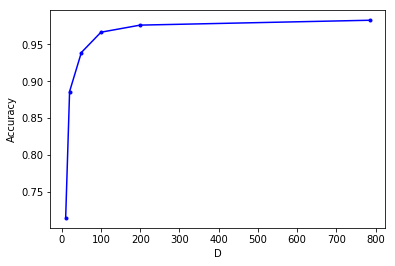

In [28]:
#plt.scatter(x = dnum, y = acc)
plt.plot(dnum, acc, '.b-')
plt.xlabel("D")
plt.ylabel("Accuracy")
plt.show()

Looks like there is a sudden increase uptil D=20, and then the accuracy is pretty stable. With this dataset, it is quite what we can expect.

### Question 6

For question 6, I am using the first approach. I get the U, S, V matrices for D=20 in a numpy array, along with the biases for each layers

In [29]:
S11, U11, V11, b1 = sess.run([s1, u1, v1, b_l1])
S21, U21, V21, b2 = sess.run([s2, u2, v2, b_l2])
S31, U31, V31, b3 = sess.run([s3, u3, v3, b_l3])
S41, U41, V41, b4 = sess.run([s4, u4, v4, b_l4])
S51, U51, V51, b5 = sess.run([s5, u5, v5, b_l5])

Now, I also fetch the weights and biases of the final layer, since we are not compressing that layer.

In [30]:
wout, bout = sess.run([w_output, b_output])

In [31]:
#Very useful command. Tells you all the variables that are not yet initialized.

#print(sess.run(tf.report_uninitialized_variables()))

Defining the weights for the new network as TF Variables

In [32]:
#Defining the weights for the new network as TF Variables

d1 = 20

V1 = tf.Variable((S11[:d1]*V11[:, :d1]).T, name = 'V1')
U1 = tf.Variable(U11[:,:20], name = 'U1')
B1 = tf.Variable(b1, name = 'B1')

V2 = tf.Variable((S21[:d1]*V21[:, :d1]).T, name = 'V2')
U2 = tf.Variable(U21[:,:20], name = 'U2')
B2 = tf.Variable(b2, name = 'B2')

V3 = tf.Variable((S31[:d1]*V31[:, :d1]).T, name = 'V3')
U3 = tf.Variable(U31[:,:20], name = 'U3')
B3 = tf.Variable(b3, name = 'B3')

V4 = tf.Variable((S41[:d1]*V41[:, :d1]).T, name = 'V4')
U4 = tf.Variable(U41[:,:20], name = 'U4')
B4 = tf.Variable(b4, name = 'B4')

V5 = tf.Variable((S51[:d1]*V51[:, :d1]).T, name = 'V5')
U5 = tf.Variable(U51[:,:20], name = 'U5')
B5 = tf.Variable(b5, name = 'B5')

W_OUT = tf.Variable(wout, name = 'WOUT')
B_OUT = tf.Variable(bout, name = 'BOUT')


Initializing all the newly defined TF variables

In [33]:
variable_list_custom = [V1, U1, V2, U2, V3, U3, V4, U4, V5, U5, B1, B2, B3, B4, B5, W_OUT, B_OUT]

# The initializer
init_custom_op = tf.variables_initializer(var_list=variable_list_custom)

In [34]:
sess.run(init_custom_op)

Defining the feed forward procedure for the new compressed network

In [35]:
L1 = tf.add(tf.matmul(q1_x,(tf.matmul(U1,V1))), B1)
L1 = tf.nn.relu(L1)

L2 = tf.add(tf.matmul(L1,(tf.matmul(U2,V2))), B2)
L2 = tf.nn.relu(L2)

L3 = tf.add(tf.matmul(L2,(tf.matmul(U3,V3))), B3)
L3 = tf.nn.relu(L3)

L4 = tf.add(tf.matmul(L3,(tf.matmul(U4,V4))), B4)
L4 = tf.nn.relu(L4)

L5 = tf.add(tf.matmul(L4,(tf.matmul(U5,V5))), B5)
L5 = tf.nn.relu(L5)

svd_output1 = L5@W_OUT +  B_OUT

svd_prediction1 = tf.nn.softmax(logits = svd_output1)

Somehow, a smaller learning rate works better for me

In [36]:
svd_lr = 0.00001

In the cell below, I define the cost and optimizer variables. The temp variable and sess.run in the cell below is used to initialize all the new variables created by the Adam optimizer.

In [37]:
temp = set(tf.global_variables())

svd_cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = svd_output1, labels = q1_y))
svd_optimizer = tf.train.AdamOptimizer(learning_rate = svd_lr).minimize(svd_cost)

sess.run(tf.variables_initializer(set(tf.global_variables()) - temp))

Creating an array to store the error in each epoch.

In [38]:
error_svd = np.zeros(epochs)

In [39]:
epochs = 15

Finally fine tuning the compressed network below.

In [40]:
#Training the model

for epoch in range(epochs):
    for _ in range(int(mnist.train.num_examples/batch_size)):
        epoch_x, epoch_y = mnist.train.next_batch(batch_size)
        l, _ = sess.run([svd_cost, svd_optimizer], feed_dict = {q1_x: epoch_x, q1_y: epoch_y})
        error_svd[epoch] += l

    print('Epoch', epoch+1, 'completed out of ', epochs,'; loss: ', error_svd[epoch])

Epoch 1 completed out of  15 ; loss:  129.86790104862303
Epoch 2 completed out of  15 ; loss:  67.73145312722772
Epoch 3 completed out of  15 ; loss:  55.163811459671706
Epoch 4 completed out of  15 ; loss:  49.232534581795335
Epoch 5 completed out of  15 ; loss:  45.3074453365989
Epoch 6 completed out of  15 ; loss:  42.27071884321049
Epoch 7 completed out of  15 ; loss:  39.738267758861184
Epoch 8 completed out of  15 ; loss:  37.55827222764492
Epoch 9 completed out of  15 ; loss:  35.62939690379426
Epoch 10 completed out of  15 ; loss:  34.03093301085755
Epoch 11 completed out of  15 ; loss:  32.515755493659526
Epoch 12 completed out of  15 ; loss:  31.144296529819258
Epoch 13 completed out of  15 ; loss:  29.800570089835674
Epoch 14 completed out of  15 ; loss:  28.677074226550758
Epoch 15 completed out of  15 ; loss:  27.528490696568042


It looks like the error has dropped down quite substantially. Let us check the accuracy for the test set.

In [41]:
svd_correct1 = tf.equal(tf.argmax(svd_prediction1, 1), tf.argmax(q1_y, 1))

svd_accuracy1 = tf.reduce_mean(tf.cast(svd_correct1, 'float'))

In [42]:
#Checking accuracy on test

acc = sess.run(svd_accuracy1, feed_dict = {q1_x:mnist.test.images, q1_y:mnist.test.labels})
print('Accuracy: ', acc)

Accuracy:  0.9739


The accuracy for the set has seen quite an improvement after fine tuning the network with D = 20, as compared to the accuracy we saw without any fine tuning.